In [25]:
import pandas as pd
import seaborn as sns

### Read data

In [3]:
df = pd.read_csv('../data/study_habits.csv')

In [6]:
del df['Student_ID']

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa,stress_level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High


In [9]:
df.shape

(2000, 7)

### EDA

#### Check data types
`stress_level` is string, all other features are float

In [11]:
df.dtypes

study_hours_per_day                float64
extracurricular_hours_per_day      float64
sleep_hours_per_day                float64
social_hours_per_day               float64
physical_activity_hours_per_day    float64
gpa                                float64
stress_level                        object
dtype: object

In [20]:
categorical_features = list(df.select_dtypes(include=["object"]).columns)

In [23]:
numerical_features = list(df.select_dtypes(exclude=["object"]).columns)

In [24]:
categorical_features, numerical_features

(['stress_level'],
 ['study_hours_per_day',
  'extracurricular_hours_per_day',
  'sleep_hours_per_day',
  'social_hours_per_day',
  'physical_activity_hours_per_day',
  'gpa'])

#### Check null values
No null values

In [12]:
df.isnull().sum()

study_hours_per_day                0
extracurricular_hours_per_day      0
sleep_hours_per_day                0
social_hours_per_day               0
physical_activity_hours_per_day    0
gpa                                0
stress_level                       0
dtype: int64

#### Descriptive statistics
mean, std, min, max, percentiles

In [13]:
df.describe()

,study_hours_per_day,extracurricular_hours_per_day,sleep_hours_per_day,social_hours_per_day,physical_activity_hours_per_day,gpa
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


#### Visualize numerical features
Target variable (`gpa`) has normal distribution without long tails

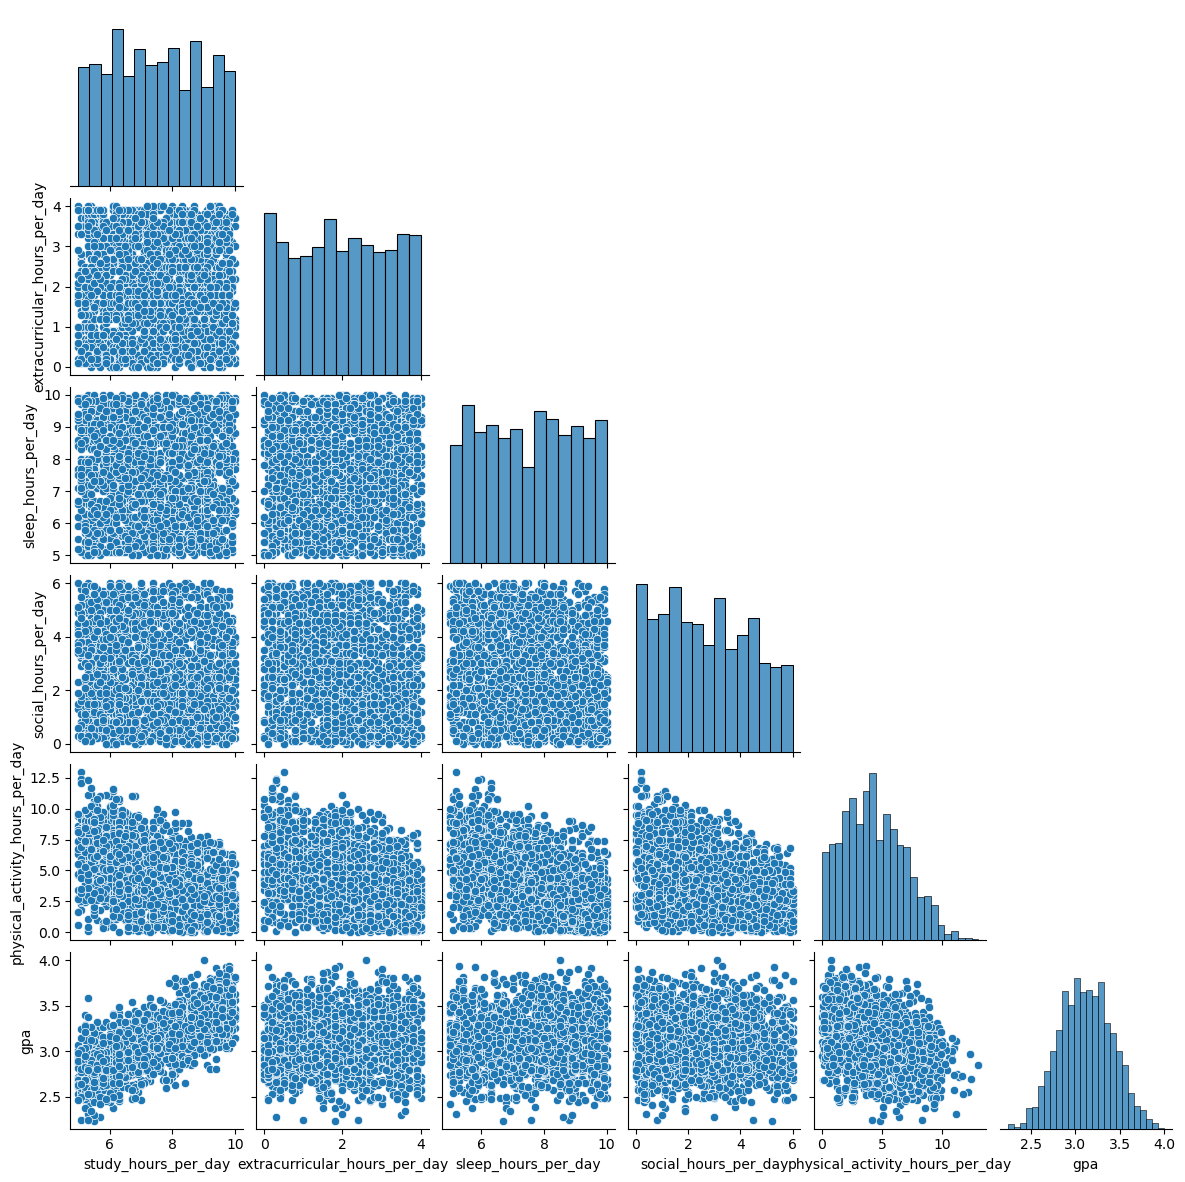

In [32]:
sns.pairplot(
    df, vars=numerical_features, kind='scatter', diag_kind='hist', corner=True, height=2
)

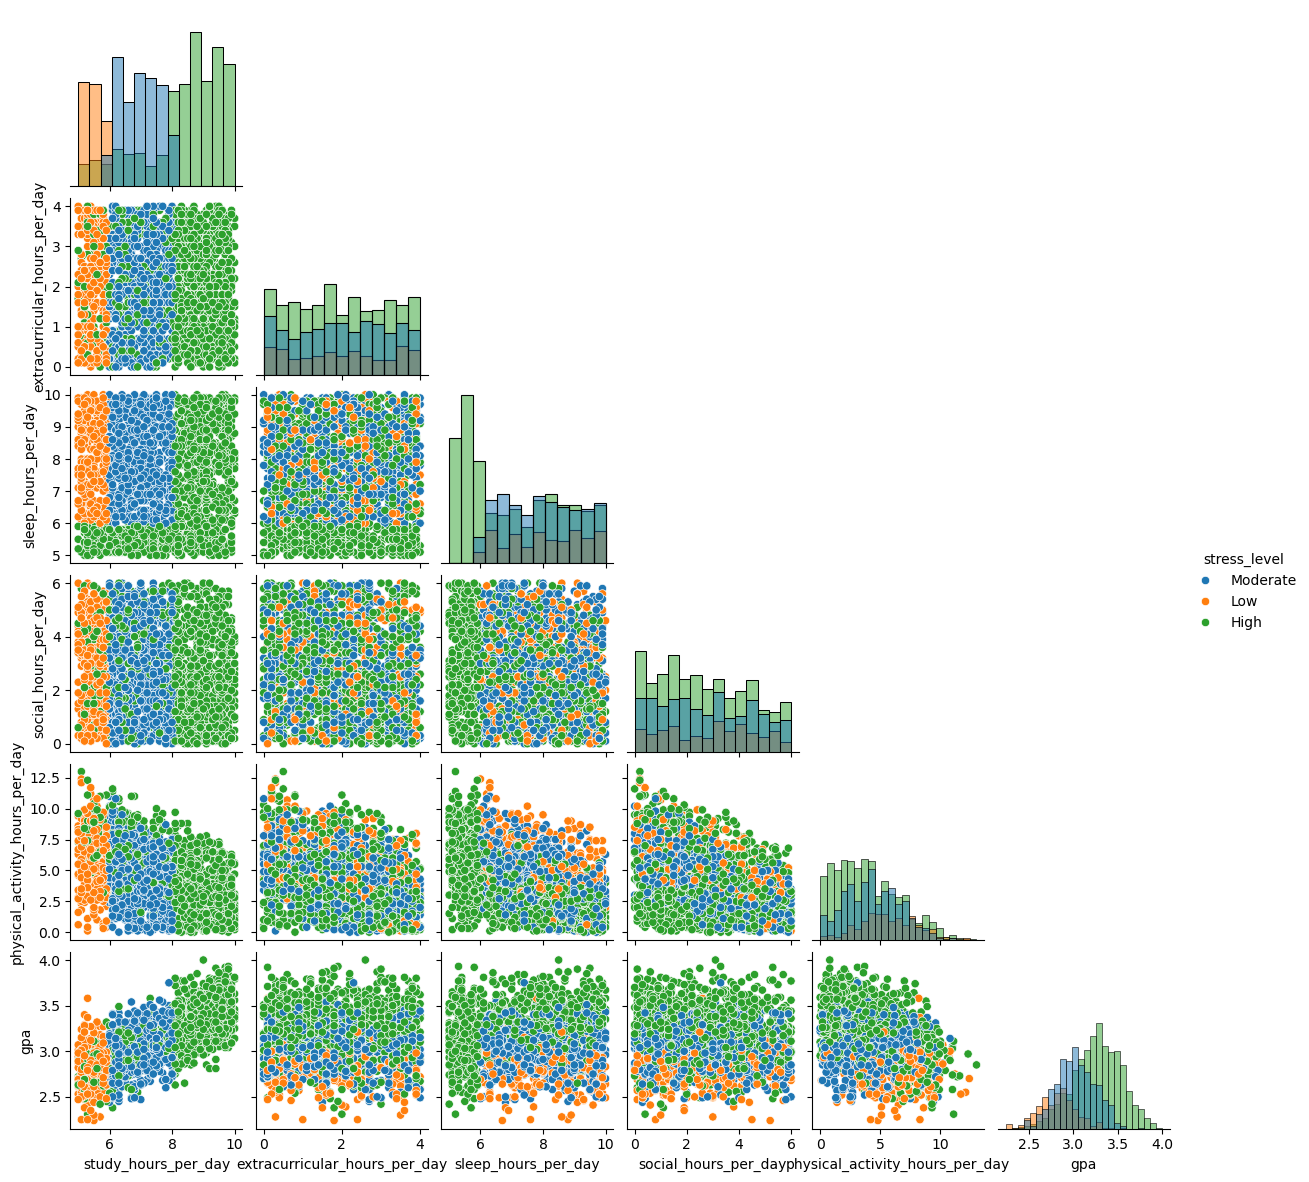

In [30]:
sns.pairplot(
    df, vars=numerical_features, kind='scatter', diag_kind='hist', corner=True, height=2, hue='stress_level'
)

#### Visualize categorical features

<Axes: xlabel='stress_level', ylabel='count'>

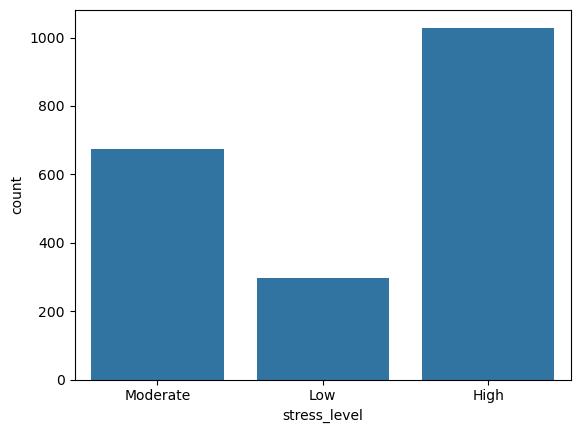

In [33]:
sns.countplot(df, x='stress_level')

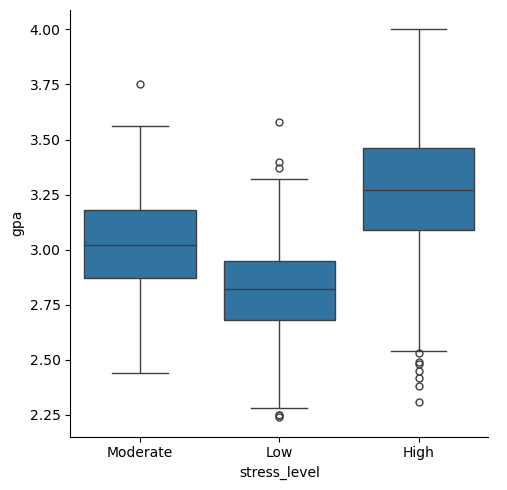

In [34]:
sns.catplot(data=df, x='stress_level', y='gpa', kind="box")

#### Correlation matrix

<Axes: >

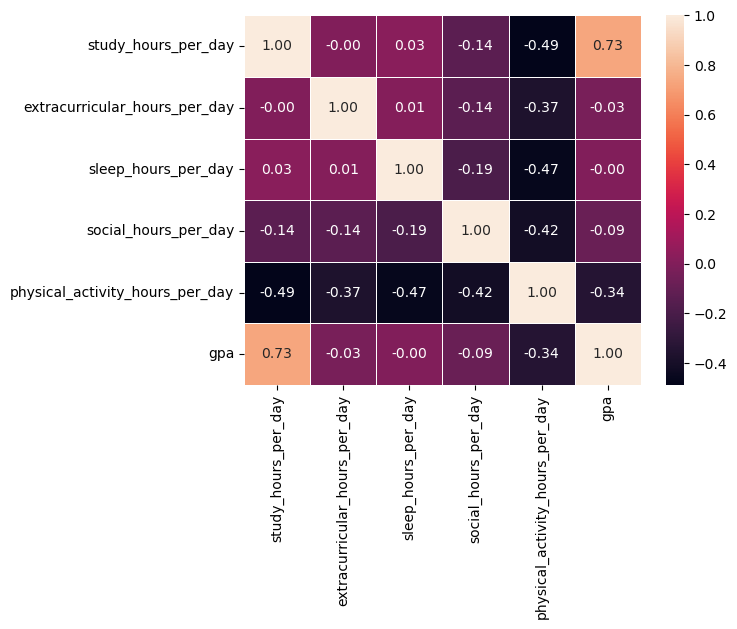

In [46]:
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=True, fmt=".2f", linewidth=.5)